Within-talkpage-network is modeled as a directed graph.

In [1]:
# construct graph from file wtpnetwork.csv

#compute weight for each edge
f = open("../data/wtpnetwork.csv", 'r')
edge_to_weight = {}
for line in f:
    key = line.rstrip()
    if key in edge_to_weight:
        edge_to_weight[key] += 1
    else:
        edge_to_weight[key] = 1

print(edge_to_weight['Jianhui67,Jasper_Deng'])

# create weighted directed graph
import networkx as nx
G=nx.DiGraph()
for (e,w) in edge_to_weight.items():
   v = e.split(",")
   G.add_edge(v[0], v[1], weight=w)

# Basic statistics
print("number of nodes: ",str(G.number_of_nodes()))
print("number of edges: ",str(G.number_of_edges()))

4
number of nodes:  1666
number of edges:  4363


## Within-Network-Page Network

We compute in-degree, out-degree statistics


w. in-degree >=1  1457
mean in-degree 2.61884753902 sd =  5.16190265386
max in-degree =  73
w. out-degree >=1  1266
mean out-degree 2.61884753902  sd = 6.16085735736
max out-degree =  117


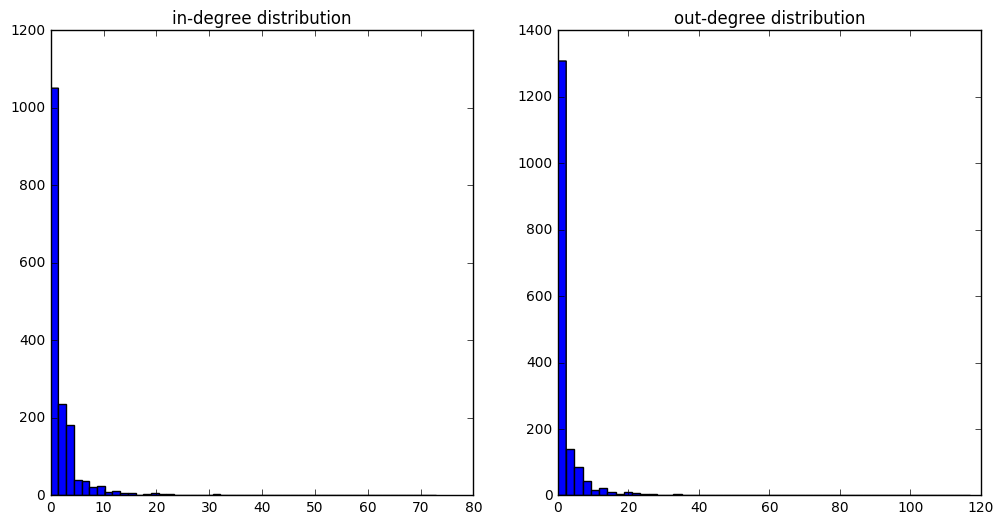

In [67]:
import numpy as np
count = 0
in_degrees = []
for indeg in G.in_degree_iter():
    in_degrees.append(indeg[1])
    if indeg[1] >= 1:
        count +=1
print("w. in-degree >=1 ", count)
print("mean in-degree", np.mean(in_degrees), "sd = ", np.std(in_degrees))
print ("max in-degree = ", np.max(in_degrees))


count = 0
out_degrees = []
for outdeg in G.out_degree_iter():
    out_degrees.append(outdeg[1])
    if outdeg[1] >= 1:
        count +=1
print("w. out-degree >=1 ", count)
print("mean out-degree", np.mean(out_degrees), " sd =", np.std(out_degrees))
print ("max out-degree = ", np.max(out_degrees))
# test = [1,1,1]
# print("mean=", np.mean(test), "sd=", np.std(test))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
idplot = fig.add_subplot(121)
idplot.hist(in_degrees, bins=50)
idplot.set_title("in-degree distribution")
odplot = fig.add_subplot(122)
odplot.hist(out_degrees, bins=50)
odplot.set_title("out-degree distribution")
plt.show()

In [78]:
test = {'apple', 'cuong'}
test.add('hallo')
print(test)

{'apple', 'hallo', 'cuong'}


In [119]:
# in degree dictionary: node -> in-degree
node_to_indegree = dict(list(G.in_degree_iter()))
max_in_degree = np.max(list(node_to_indegree.values()))

# inverted index: in-degree -> node
indegree_to_node = [set() for x in range(0, max_in_degree+1)]
for k, v in node_to_indegree.items():
    indegree_to_node[v].add(k)
    
print("The person got asked alot ", indegree_to_node[max_in_degree])
print ("max in degree", max_in_degree)
# out degree dictionary: node -> out-degree
node_to_outdegree = dict(list(G.out_degree_iter()))
max_out_degree = np.max(list(node_to_outdegree.values()))
# inverted index: out-degree -> node
outdegree_to_node = [set() for x in range(0, max_out_degree+1)]
for k, v in node_to_outdegree.items():
    outdegree_to_node[v].add(k)
    
print("The person asked alot ", outdegree_to_node[max_out_degree])
print ("max out degree", max_out_degree)

The person got asked alot  {'Ymblanter'}
max in degree 73
The person asked alot  {'Ymblanter'}
max out degree 117


Avg. indegree  2.61884753902
Std. indegree  5.16190265386
Avg. outdegree 2.61884753902
Std. outdegree 6.16085735736


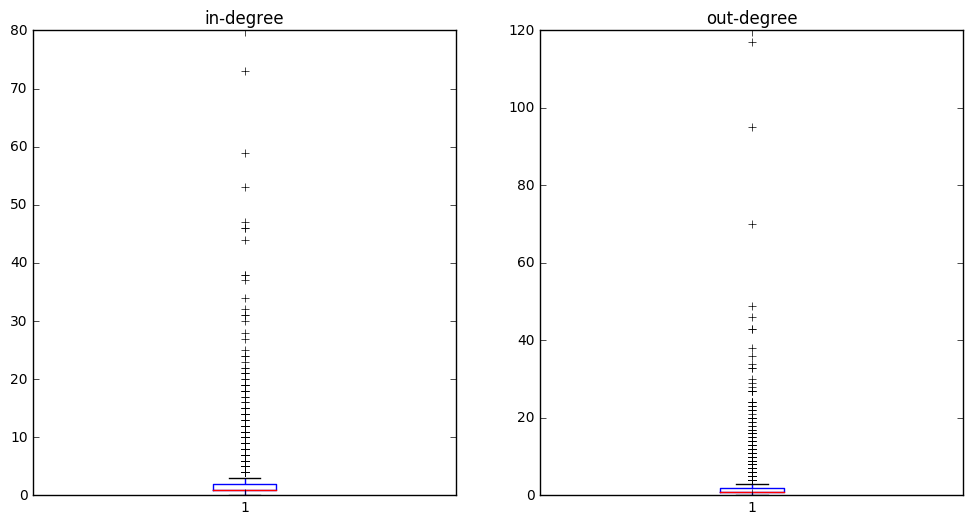

In [118]:
import numpy as np
in_degrees = list(node_to_indegree.values())
print("Avg. indegree ", np.mean(in_degrees))
print("Std. indegree ", np.std(in_degrees))
out_degrees = list(node_to_outdegree.values())
print("Avg. outdegree", np.mean(out_degrees))
print("Std. outdegree", np.std(out_degrees))
fig2 = plt.figure(figsize=(12,6))
indegbox = fig2.add_subplot(121)
indegbox.set_title("in-degree")
indegbox.boxplot(in_degrees)
outdegbox = fig2.add_subplot(122)
outdegbox.set_title("out-degree")
outdegbox.boxplot(out_degrees)
plt.show()

# Visualization


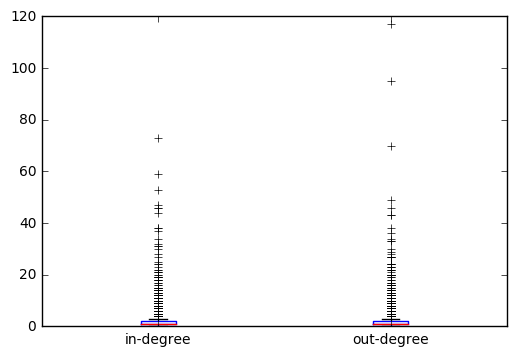

In [135]:
in_degrees = list(node_to_indegree.values())
out_degrees = list(node_to_outdegree.values())
data = [in_degrees, out_degrees]
plt.figure()
plt.boxplot(data, labels=["in-degree", "out-degree"])
plt.savefig("/Users/totucuong-standard/Projects/wikisocial-paper/images/boxplot_degree")
plt.show()

## Top influnencers

In [165]:
alist = [2,3,2]
aset = set(alist)
sorted(aset, reverse=True)

[3, 2]

In [170]:
# ranking by in-degree
print("Top 10 replier: ")
indegree_sorted = sorted(set(in_degrees), reverse=True)
for i in range(0, 10):
    print(indegree_to_node[indegree_sorted[i]], indegree_sorted[i])
print('*'*80)
print("Top 10 querier: ")
outdegree_sorted = sorted(set(out_degrees), reverse=True)
for i in range(0, 10):
    print(outdegree_to_node[outdegree_sorted[i]], outdegree_sorted[i])
    
# print(outdegree_sorted[9])

Top 10 replier: 
{'Ymblanter'} 73
{'Ricordi'} 59
{'Zolo'} 53
{'Kolja21'} 47
{'Stryn', 'Vogone'} 46
{'Tobias1984'} 44
{'Succu', 'Multichill'} 38
{'Infovarius'} 37
{'Cycn'} 34
{'Jura1'} 32
********************************************************************************
Top 10 querier: 
{'Ymblanter'} 117
{'Ricordi'} 95
{'Kolja21'} 70
{'Vogone'} 49
{'Jared_Preston'} 46
{'Yamaha5', 'Jasper_Deng'} 43
{'Multichill'} 38
{'Hsarrazin'} 36
{'לערי_ריינהארט'} 34
{'Tobias1984', 'Zolo'} 33


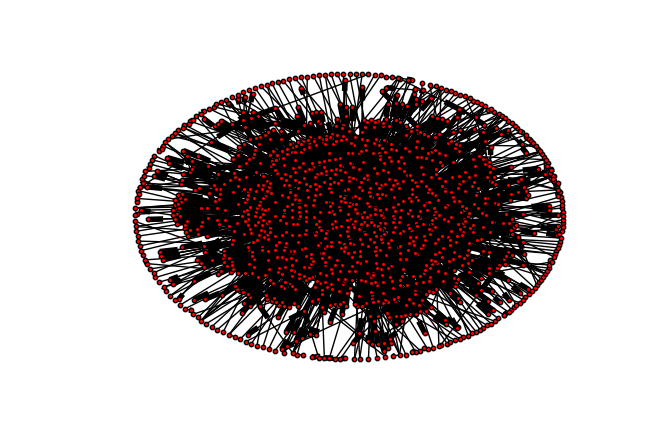

In [136]:
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

# G=nx.path_graph(8)

nx.draw(GG, node_size=10)
plt.savefig("wtp-network.png") # save as png
plt.show() # display

## Connected components
The statistics in this section is computed by treating G as undirected graph (UG)

In [19]:
UG = G.to_undirected()
# nC = nx.number_connected_components(UG)
# C = nx.connected_components(UG)
largest_cc = max(nx.connected_components(UG), key=len)
print("number of nodes in large connected component", len(largest_cc))
print("size of giant component compared to original graph", len(largest_cc)/G.number_of_nodes()*100)
print("size of giant component", len(largest_cc))

number of nodes in large connected component 1428
size of giant component compared to original graph 85.71428571428571
size of giant component 1428


## Distance measures


In [28]:
# giant component
GG = G.subgraph(largest_cc)
print("GG is ",nx.is_directed(GG))
print("average distance in giant component: ", nx.average_shortest_path_length(GG))
print(len(GG))

GG is  True
average distance:  2.2444232773698127
1428


In [20]:
print("number of nodes ", len(paths.keys()))
print(len(paths['Acroterion']))
# for target in paths['Acroterion']:
#     print("path length from Acroterion", len(paths['Acroterion'][target]))

number of nodes  1428
1189
